Proyecto: Asesoría de potencias B2B monoCUPS

La herramienta pretende facilitar la labor del departamento comercial de segmento B2B de cualquier empresa en España, permitiéndoles de una manera rápida la elaboración de un documento de asesoramiento de potencias.

In [1]:
import numpy as np
import pandas as pd
import os
from tabulate import tabulate
from datetime import date, datetime
# Parametros
import tabula

1º Visualización (EDA)

In [2]:
# Descripción Registros de medidas horarias o cuarto-horarias a insertar manualmente
# La curva de carga horaria es una representación gráfica de la carga o demanda eléctrica a lo largo del tiempo. 
# Se genera a partir de las lecturas reales registradas cada cuarto de hora por el contador digital instalado en el hogar.
#  Dichas lecturas cuarto-horarias se integrarán para obtener un dato cada hora.

curva = pd.read_excel("exceles/CurvaCuartoHoraria_VariosContratos.xlsx")
curva.head()

,CUPS,FechaMedida,EPOCA,ActivaEntrante,ActivaSaliente,ReactivaQ1,ReactivaQ2,ReactivaQ3,ReactivaQ4
0,ES0031300839367001RL,2021-10-22 00:15:00,1,54,0,5,0,0,1
1,ES0031300839367001RL,2021-10-22 00:30:00,1,48,0,4,0,0,0
2,ES0031300839367001RL,2021-10-22 00:45:00,1,50,0,8,0,0,0
3,ES0031300839367001RL,2021-10-22 01:00:00,1,42,0,2,0,0,0
4,ES0031300839367001RL,2021-10-22 01:15:00,1,57,0,7,0,0,0


In [3]:
curva['CUPS'].value_counts()

ES0031405509076001WC    37056
ES0031405835487001AB    37056
ES0031405933271001TV    37056
ES0031406126350001SC    37056
ES0031406126362001PZ    37056
ES0031446444218001WB    37056
ES0031406134794001CF     9988
ES0031300839367001RL     2980
Name: CUPS, dtype: int64

In [4]:
cups1 = curva['CUPS'] == 'ES0031300839367001RL'     
cupses = curva[cups1]
cupses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 0 to 2979
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CUPS            2980 non-null   object        
 1   FechaMedida     2980 non-null   datetime64[ns]
 2   EPOCA           2980 non-null   int64         
 3   ActivaEntrante  2980 non-null   int64         
 4   ActivaSaliente  2980 non-null   int64         
 5   ReactivaQ1      2980 non-null   int64         
 6   ReactivaQ2      2980 non-null   int64         
 7   ReactivaQ3      2980 non-null   int64         
 8   ReactivaQ4      2980 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 232.8+ KB


In [5]:
cupses['Dates'] = pd.to_datetime(cupses['FechaMedida']).dt.date
cupses['Time'] = pd.to_datetime(cupses['FechaMedida']).dt.time

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
cupses = cupses.reset_index(drop = True)
cupses.head()

,CUPS,FechaMedida,EPOCA,ActivaEntrante,ActivaSaliente,ReactivaQ1,ReactivaQ2,ReactivaQ3,ReactivaQ4,Dates,Time
0,ES0031300839367001RL,2021-10-22 00:15:00,1,54,0,5,0,0,1,2021-10-22,00:15:00
1,ES0031300839367001RL,2021-10-22 00:30:00,1,48,0,4,0,0,0,2021-10-22,00:30:00
2,ES0031300839367001RL,2021-10-22 00:45:00,1,50,0,8,0,0,0,2021-10-22,00:45:00
3,ES0031300839367001RL,2021-10-22 01:00:00,1,42,0,2,0,0,0,2021-10-22,01:00:00
4,ES0031300839367001RL,2021-10-22 01:15:00,1,57,0,7,0,0,0,2021-10-22,01:15:00


In [7]:
# Setting the Date as index
cupses = cupses.set_index("Dates")
cupses

,CUPS,FechaMedida,EPOCA,ActivaEntrante,ActivaSaliente,ReactivaQ1,ReactivaQ2,ReactivaQ3,ReactivaQ4,Time
Dates,,,,,,,,,,
2021-10-22,ES0031300839367001RL,2021-10-22 00:15:00,1,54,0,5,0,0,1,00:15:00
2021-10-22,ES0031300839367001RL,2021-10-22 00:30:00,1,48,0,4,0,0,0,00:30:00
2021-10-22,ES0031300839367001RL,2021-10-22 00:45:00,1,50,0,8,0,0,0,00:45:00
2021-10-22,ES0031300839367001RL,2021-10-22 01:00:00,1,42,0,2,0,0,0,01:00:00
2021-10-22,ES0031300839367001RL,2021-10-22 01:15:00,1,57,0,7,0,0,0,01:15:00
...,...,...,...,...,...,...,...,...,...,...
2021-11-21,ES0031300839367001RL,2021-11-21 23:00:00,0,51,0,4,0,0,0,23:00:00
2021-11-21,ES0031300839367001RL,2021-11-21 23:15:00,0,43,0,3,0,0,0,23:15:00
2021-11-21,ES0031300839367001RL,2021-11-21 23:30:00,0,42,0,3,0,0,0,23:30:00


In [8]:
cupses['FechaMedida'] = cupses['FechaMedida'].astype(str)
dia1 = cupses[cupses.FechaMedida.str.contains('2021-10-23')]

In [9]:
dia1.reset_index(inplace=True)

In [10]:
dia1

,Dates,CUPS,FechaMedida,EPOCA,ActivaEntrante,ActivaSaliente,ReactivaQ1,ReactivaQ2,ReactivaQ3,ReactivaQ4,Time
0,2021-10-23,ES0031300839367001RL,2021-10-23 00:00:00,1,38,0,0,0,0,2,00:00:00
1,2021-10-23,ES0031300839367001RL,2021-10-23 00:15:00,1,54,0,6,0,0,0,00:15:00
2,2021-10-23,ES0031300839367001RL,2021-10-23 00:30:00,1,46,0,3,0,0,1,00:30:00
3,2021-10-23,ES0031300839367001RL,2021-10-23 00:45:00,1,53,0,6,0,0,1,00:45:00
4,2021-10-23,ES0031300839367001RL,2021-10-23 01:00:00,1,43,0,4,0,0,1,01:00:00
...,...,...,...,...,...,...,...,...,...,...,...
91,2021-10-23,ES0031300839367001RL,2021-10-23 22:45:00,1,48,0,4,0,0,1,22:45:00
92,2021-10-23,ES0031300839367001RL,2021-10-23 23:00:00,1,41,0,7,0,0,0,23:00:00
93,2021-10-23,ES0031300839367001RL,2021-10-23 23:15:00,1,39,0,3,0,0,1,23:15:00
94,2021-10-23,ES0031300839367001RL,2021-10-23 23:30:00,1,40,0,2,0,0,0,23:30:00


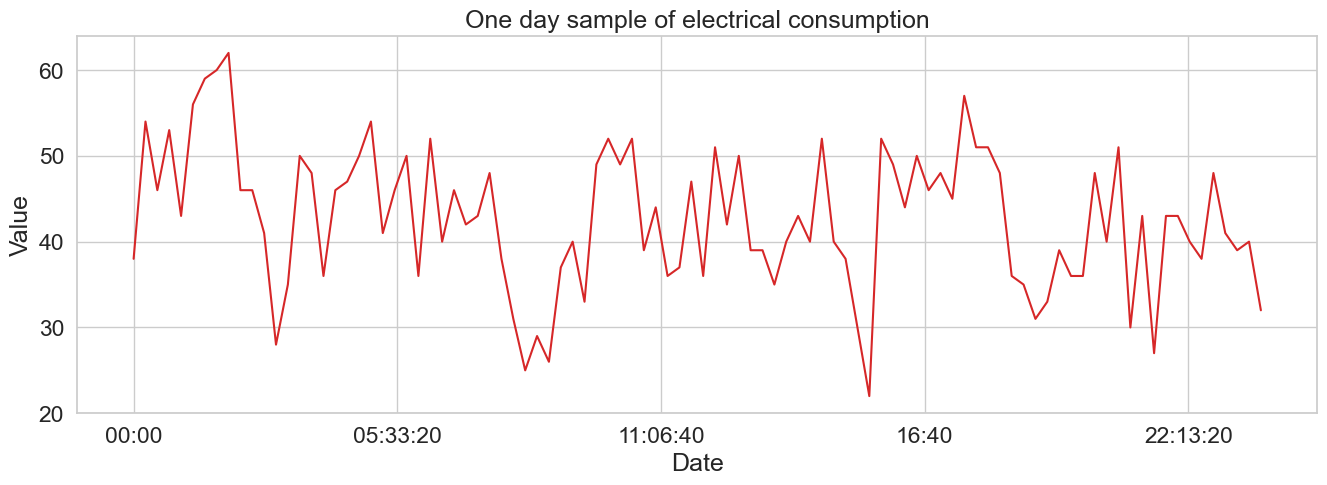

In [11]:
# dia1['Time'] = dia1['Time'].astype(str)

# libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, AutoDateLocator, ConciseDateFormatter
import seaborn as sns

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    # Define the date format
    locator = AutoDateLocator()
    formatter = ConciseDateFormatter(locator)

    plt.show()

plot_df(dia1, x=dia1.Time, y=dia1.ActivaEntrante, title='One day sample of electrical consumption')    

In [12]:
startdate = pd.to_datetime("2021-10-22").date()
enddate = pd.to_datetime("2021-10-29").date()
sem1 = cupses.loc[startdate:enddate]

# pandas.Series.between() function Using two dates
#sem1 = cupses.loc[cupses["Dates"].between("2021-10-22", "2021-10-29")]

sem1 # Debería mirar si existe algún dia en que la activaEntrante sea nula

,CUPS,FechaMedida,EPOCA,ActivaEntrante,ActivaSaliente,ReactivaQ1,ReactivaQ2,ReactivaQ3,ReactivaQ4,Time
Dates,,,,,,,,,,
2021-10-22,ES0031300839367001RL,2021-10-22 00:15:00,1,54,0,5,0,0,1,00:15:00
2021-10-22,ES0031300839367001RL,2021-10-22 00:30:00,1,48,0,4,0,0,0,00:30:00
2021-10-22,ES0031300839367001RL,2021-10-22 00:45:00,1,50,0,8,0,0,0,00:45:00
2021-10-22,ES0031300839367001RL,2021-10-22 01:00:00,1,42,0,2,0,0,0,01:00:00
2021-10-22,ES0031300839367001RL,2021-10-22 01:15:00,1,57,0,7,0,0,0,01:15:00
...,...,...,...,...,...,...,...,...,...,...
2021-10-29,ES0031300839367001RL,2021-10-29 22:45:00,1,54,0,9,0,0,0,22:45:00
2021-10-29,ES0031300839367001RL,2021-10-29 23:00:00,1,39,0,1,0,0,1,23:00:00
2021-10-29,ES0031300839367001RL,2021-10-29 23:15:00,1,44,0,4,0,0,0,23:15:00


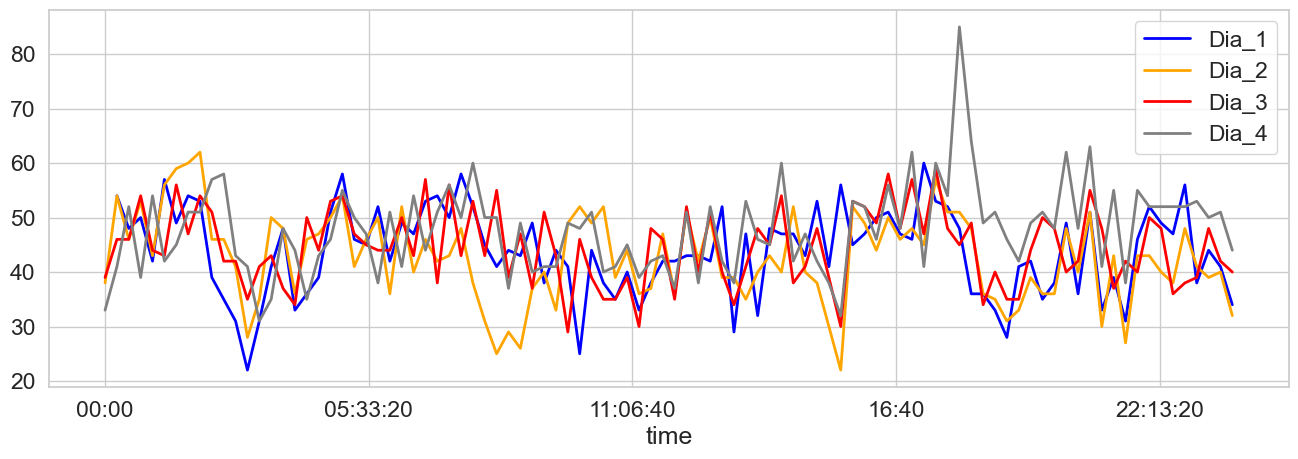

In [13]:
# Figure Size
plt.figure(figsize=(16,5), dpi=100)

# multiple line plots
plt.plot(sem1['Time'].iloc[:95], sem1['ActivaEntrante'].iloc[0:95], color='blue', linewidth=2, label="Dia_1")
plt.plot(sem1['Time'].iloc[95:191], sem1['ActivaEntrante'].iloc[95:191], color='orange', linewidth=2, label="Dia_2")
plt.plot(sem1['Time'].iloc[191:287], sem1['ActivaEntrante'].iloc[191:287], color='red', linewidth=2, label="Dia_3")
plt.plot(sem1['Time'].iloc[287:383], sem1['ActivaEntrante'].iloc[287:383], color='gray', linewidth=2, label="Dia_4")
#plt.plot(sem1['Time'].iloc[:95], sem1['ActivaEntrante'].iloc[0:95], color='olive', linewidth=2, label="Dia_5")
#plt.plot(sem1['Time'].iloc[:95], sem1['ActivaEntrante'].iloc[0:95], color='pink', linewidth=2, label="Dia_6")

# Define the date format
locator = AutoDateLocator()
formatter = ConciseDateFormatter(locator)

# show legend
plt.legend()

# show graph
plt.show()


c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


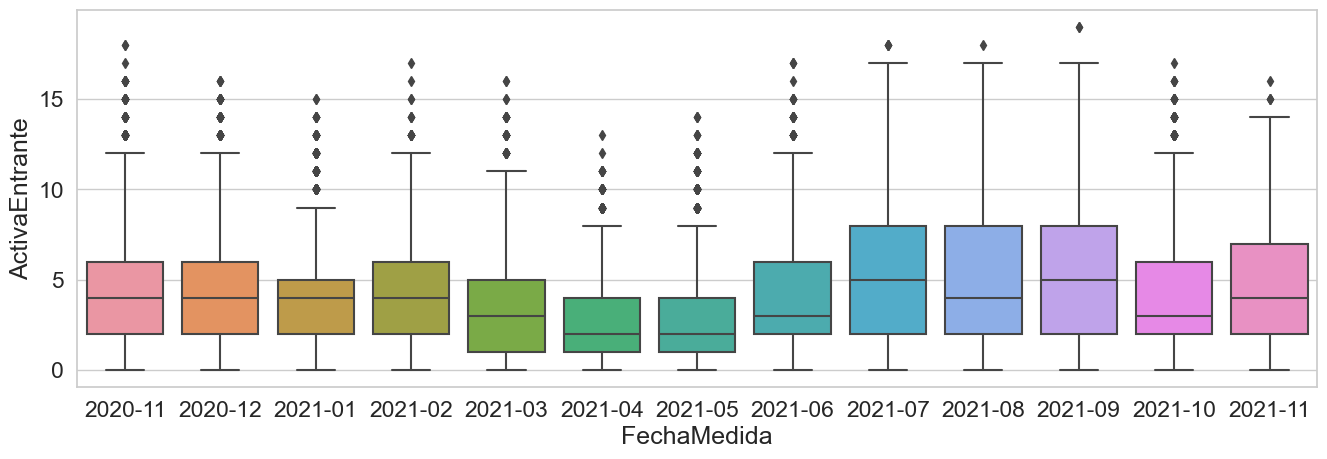

In [14]:
#Mes1 --> Month-Wise Boxplot 

cups2 = curva['CUPS'] == 'ES0031446444218001WB'     
df2 = curva[cups2]

df2['FechaMedida'] = df2['FechaMedida'].astype(str).str[:-12]

# Figure Size
plt.figure(figsize=(16,5), dpi=100)

# boxplot
ax = sns.boxplot(x=df2["FechaMedida"], y=df2["ActivaEntrante"])
# add stripplot
#ax = sns.stripplot(x=df2["FechaMedida"], y=df2["ActivaEntrante"], color="orange", jitter=0.2, size=2.5)

# show the graph
plt.show()

In [15]:
#GROUP BY + BarPlot
df2_1 = df2.groupby('FechaMedida').sum()


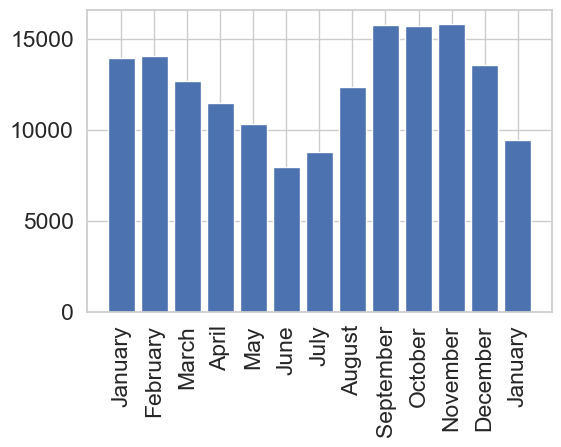

In [16]:
y_pos = np.arange(len(df2_1.index))

# Figure Size
plt.figure(figsize=(6,4), dpi=100)

# Create bars
plt.bar(y_pos, df2_1['ActivaEntrante'])

# Create names on the x-axis
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January']
plt.xticks(y_pos, labels, rotation = 'vertical')

# Show graphic
plt.show()


In [17]:
# Imagen de Potencias máximas Mes_a_Mes

2º Paso_Parametros

#Tipo De Punto; #Taraifas; #Festivos Nacionales

In [53]:
tipo_punto = [1, 2, 3, 4, 5] #ó tipo_punto ={punto_medida : [1, 2, 3, 4, 5]}

tarifas = ['2_0TD', '3_0TD', '6_1TD', '6_2TD', '6_3TD', '6_4TD'] #ó tarifas ={tarifa : ['2_0TD', '3_0TD', '6_1TD', '6_2TD', '6_3TD', '6_4TD']}

festivos_nacionales = ['01/01/2019', '19/04/2019', '01/05/2019', '15/08/2019',
'12/10/2019','01/11/2019','06/12/2019','25/12/2019','01/01/2020','06/01/2020','10/04/2020','01/01/2020','01/05/2020',
'15/08/2020','12/10/2020','08/12/2020','25/12/2020','01/01/2021','06/01/2021','02/04/2021','01/05/2021','12/10/2021',
'01/11/2021','06/12/2021','08/12/2021','25/12/2021','01/01/2022','06/01/2022','15/04/2022','15/08/2022','12/10/2022',
'01/11/2022','06/12/2022','08/12/2022']

#list comprehension
my_date_list = [datetime.strptime(x,'%d/%m/%Y') for x in festivos_nacionales] # festivos como datetime¿?

#Precio del Exceso te potencia (Puntos 4 y 5)

In [54]:
# read PDF file
# (all_tables =  pages="all")
df = tabula.read_pdf("pdfs/BOE_2022.pdf", lattice=True, pages=8, pandas_options={'header': None})
# number of tables extracted
print('Tipo de variable: ' + str(type(df)) + ', numero de elementos: ' + str(len(df)))

Got stderr: oct 05, 2022 3:32:18 PM org.apache.fontbox.ttf.CmapSubtable processSubtype14
ADVERTENCIA: Format 14 cmap table is not supported and will be ignored



Tipo de variable: <class 'list'>, numero de elementos: 3


In [55]:
tbl_excPot_med4y5 = df[0]
# Transpose df
tbl_excPot_med4y5 = tbl_excPot_med4y5.T
# Rename Columns
tbl_excPot_med4y5.rename(columns={0: 'Tarifa',
                   1: 'Precio_exceso_potencia_(€/kW*día)'},
          inplace=True)
# Drop first row
tbl_excPot_med4y5.drop(index=tbl_excPot_med4y5.index[0], 
        axis=0, 
        inplace=True)

#Transform , into . :
tbl_excPot_med4y5 = tbl_excPot_med4y5.apply(lambda x: x.str.replace(',','.'))

#Transfor column to numeric
tbl_excPot_med4y5["Precio_exceso_potencia_(€/kW*día)"] = pd.to_numeric(tbl_excPot_med4y5["Precio_exceso_potencia_(€/kW*día)"])

#Tarifas
tbl_excPot_med4y5['Tarifa'] = tarifas

tbl_excPot_med4y5

,Tarifa,Precio_exceso_potencia_(€/kW*día)
1,2_0TD,0.078858
2,3_0TD,0.081164
3,6_1TD,0.118186
4,6_2TD,0.082554
5,6_3TD,0.074580
6,6_4TD,0.073806


#Precio del Exceso de potencia (Puntos 1,2 y 3)

In [56]:
tbl_excPot_med123 = df[1]
# Transpose df
tbl_excPot_med123 = tbl_excPot_med123.T
# Rename Columns
tbl_excPot_med123.rename(columns={0: 'Tarifa',
                   1: 'Precio_exceso_potencia_(€/kW*día)'},
          inplace=True)
# Drop first row
tbl_excPot_med123.drop(index=tbl_excPot_med123.index[0], 
        axis=0, 
        inplace=True)

#Transform , into . :
tbl_excPot_med123 = tbl_excPot_med123.apply(lambda x: x.str.replace(',','.'))

#Transfor column to numeric
tbl_excPot_med123["Precio_exceso_potencia_(€/kW*día)"] = pd.to_numeric(tbl_excPot_med123["Precio_exceso_potencia_(€/kW*día)"])

#Tarifas
tbl_excPot_med123['Tarifa'] = tarifas

tbl_excPot_med123  #.info()

,Tarifa,Precio_exceso_potencia_(€/kW*día)
1,2_0TD,2.398610
2,3_0TD,2.468725
3,6_1TD,2.500611
4,6_2TD,2.511007
5,6_3TD,2.268489
6,6_4TD,2.244925


#Coeficiente KP

In [57]:
coeficiente_Kp = df[2]
# Areglos necesarios (Buscar maneras más inteligentes y automaticas de resolver este problema)
coeficiente_Kp.iloc[2:7, 2:8] = coeficiente_Kp.iloc[2:7, 1:7]
coeficiente_Kp.iloc[2:, 1:2] = coeficiente_Kp.iloc[2:, :1]
# Drop first row
coeficiente_Kp.drop([0], 
        axis=1, 
        inplace=True)

new_header = coeficiente_Kp.iloc[0] #grab the first row for the header
coeficiente_Kp = coeficiente_Kp[1:] #take the data less the header row
coeficiente_Kp.columns = new_header #set the header row as the df header

#Transform , into . :
coeficiente_Kp = coeficiente_Kp.apply(lambda x: x.str.replace(',','.'))
coeficiente_Kp = coeficiente_Kp.apply(lambda x: x.str.replace("–", "0"))

#Transfor column to numeric
for columna in coeficiente_Kp.columns:
        coeficiente_Kp[columna] = pd.to_numeric(coeficiente_Kp[columna])

#coeficiente_Kp['Periodo'] = ['P1', 'P2','P3','P4','P5','P6']
coeficiente_Kp #.info()

,Periodo,2.0 TD,3.0 TD,6.1 TD,6.2 TD,6.3 TD,6.4 TD
1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2,0.040842,0.872171,1.000000,1.000000,1.000000,0.765346
3,3,0.000000,0.351490,0.545204,0.489150,0.553151,0.368150
4,4,0.000000,0.267082,0.412967,0.444995,0.323415,0.271009
5,5,0.000000,0.106998,0.027431,0.030784,0.063681,0.051202
6,6,0.000000,0.106998,0.027431,0.030784,0.063681,0.051202


In [58]:
#Necesito trasponerla para que quede identica que la anterior 
tbl_coeficiente_Kp = coeficiente_Kp.iloc[:,1:].T
tbl_coeficiente_Kp.columns = coeficiente_Kp.Periodo
tbl_coeficiente_Kp.reset_index(inplace=True)
tbl_coeficiente_Kp.columns = ['Tarifa', 'Periodo 1',
'Periodo 2', 'Periodo 3', 'Periodo 4',
'Periodo 5', 'Periodo 6']

#ColumnaTarifas
tbl_coeficiente_Kp['Tarifa'] = tarifas
#RenameColumns
tbl_coeficiente_Kp.rename(columns={'Tarifa': 'Tarifa', 'Periodo 1': 'P1', 'Periodo 2': 'P2', 'Periodo 3': 'P3', 'Periodo 4': 'P4', 'Periodo 5': 'P5', 'Periodo 6': 'P6'},
          inplace=True)

tbl_coeficiente_Kp

,Tarifa,P1,P2,P3,P4,P5,P6
0,2_0TD,1.0,0.040842,0.000000,0.000000,0.000000,0.000000
1,3_0TD,1.0,0.872171,0.351490,0.267082,0.106998,0.106998
2,6_1TD,1.0,1.000000,0.545204,0.412967,0.027431,0.027431
3,6_2TD,1.0,1.000000,0.489150,0.444995,0.030784,0.030784
4,6_3TD,1.0,1.000000,0.553151,0.323415,0.063681,0.063681
5,6_4TD,1.0,0.765346,0.368150,0.271009,0.051202,0.051202


#Precio Termino de Potencia (Transporte + Distribución)

In [59]:
# read PDF file
#(all_tables =  pages="all")
df2 = tabula.read_pdf("pdfs/BOE_2022.pdf", lattice=True, pages=[5,6], pandas_options={'header': None})
#Pre
tbl_terPrecPot_trp = df2[0] 
tbl_terPrecPot_dis = df2[1] 
# number of tables extracted
print('Tipo de variable: ' + str(type(df)) + ', numero de elementos: ' + str(len(df)))

Tipo de variable: <class 'list'>, numero de elementos: 3


In [60]:
new_header = tbl_terPrecPot_trp.iloc[1] #grab the first row for the header
tbl_terPrecPot_trp = tbl_terPrecPot_trp[1:] #take the data less the header row
tbl_terPrecPot_trp.columns = new_header #set the header row as the df header
# Rename Column
tbl_terPrecPot_trp.columns = ['Tarifa', 'Periodo 1',
'Periodo 2', 'Periodo 3', 'Periodo 4',
'Periodo 5', 'Periodo 6']
# Drop first row
tbl_terPrecPot_trp.drop(index=tbl_terPrecPot_trp.index[0],
        axis=0, 
        inplace=True)

#Transform , into . :
tbl_terPrecPot_trp = tbl_terPrecPot_trp.apply(lambda x: x.str.replace(',','.'))
tbl_terPrecPot_trp = tbl_terPrecPot_trp.apply(lambda x: x.str.replace("–", "0"))

#Transfor column to numeric
for columna in tbl_terPrecPot_trp.columns[1:]:
        tbl_terPrecPot_trp[columna] = pd.to_numeric(tbl_terPrecPot_trp[columna])

#tbl_terPrecPot_trp['Tarifa'] = tarifas
#tbl_terPrecPot_trp['Periodo'] = ['P1', 'P2','P3','P4','P5','P6']
tbl_terPrecPot_trp #.info()

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Tarifa,Periodo 1,Periodo 2,Periodo 3,Periodo 4,Periodo 5,Periodo 6
2,2.0 TD,3.587080,0.073398,0.000000,0.000000,0.000000,NaN
3,3.0 TD,1.504138,1.271316,0.563586,0.444091,0.079027,0.079027
4,6.1 TD,4.988519,4.988519,2.675491,2.061479,0.170936,0.170936
5,6.2 TD,5.561606,5.561606,2.839076,2.238890,0.200598,0.200598
6,6.3 TD,5.491879,5.491879,2.848482,2.229437,0.275903,0.275903
7,6.4 TD,10.314368,7.894062,3.797235,2.795290,0.528120,0.528120


In [61]:
new_header = tbl_terPrecPot_dis.iloc[1] #grab the first row for the header
tbl_terPrecPot_dis = tbl_terPrecPot_dis[1:] #take the data less the header row
tbl_terPrecPot_dis.columns = new_header #set the header row as the df header
# Rename Column
tbl_terPrecPot_dis.columns = ['Tarifa', 'Periodo 1',
'Periodo 2', 'Periodo 3', 'Periodo 4',
'Periodo 5', 'Periodo 6']
# Drop first row
tbl_terPrecPot_dis.drop(index=tbl_terPrecPot_dis.index[0],
        axis=0, 
        inplace=True)

#Transform , into . :
tbl_terPrecPot_dis = tbl_terPrecPot_dis.apply(lambda x: x.str.replace(',','.'))
tbl_terPrecPot_dis = tbl_terPrecPot_dis.apply(lambda x: x.str.replace("–", "0"))

#Transfor column to numeric
for columna in tbl_terPrecPot_dis.columns[1:]:
        tbl_terPrecPot_dis[columna] = pd.to_numeric(tbl_terPrecPot_dis[columna])

#tbl_terPrecPot_dis['Tarifa'] = tarifas
#tbl_terPrecPot_dis['Periodo'] = ['P1', 'P2','P3','P4','P5','P6']
tbl_terPrecPot_dis #.info()

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Tarifa,Periodo 1,Periodo 2,Periodo 3,Periodo 4,Periodo 5,Periodo 6
2,2.0 TD,19.401176,0.865492,0.000000,0.000000,0.000000,NaN
3,3.0 TD,8.989782,7.881176,3.124926,2.358648,1.043806,1.043806
4,6.1 TD,13.332285,13.332285,7.313080,5.504410,0.331615,0.331615
5,6.2 TD,8.031285,8.031285,3.809881,3.809881,0.217848,0.217848
6,6.3 TD,4.529172,4.529172,2.694675,1.011523,0.362245,0.362245
7,6.4 TD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [62]:
#Sumamos
tbl_terPrecPot = tbl_terPrecPot_dis + tbl_terPrecPot_trp
#Tarifas
tbl_terPrecPot['Tarifa'] = tarifas
#FillNaN
tbl_terPrecPot = tbl_terPrecPot.fillna(0)

tbl_terPrecPot

,Tarifa,Periodo 1,Periodo 2,Periodo 3,Periodo 4,Periodo 5,Periodo 6
2,2_0TD,22.988256,0.938890,0.000000,0.000000,0.000000,0.000000
3,3_0TD,10.493920,9.152492,3.688512,2.802739,1.122833,1.122833
4,6_1TD,18.320804,18.320804,9.988571,7.565889,0.502551,0.502551
5,6_2TD,13.592891,13.592891,6.648957,6.048771,0.418446,0.418446
6,6_3TD,10.021051,10.021051,5.543157,3.240960,0.638148,0.638148
7,6_4TD,10.314368,7.894062,3.797235,2.795290,0.528120,0.528120


In [63]:
#1) No estaría mal encontrar una manera de almacenar las tablas de manera permanente (Pickel, Sqlite3, SqliteDict)
#2) Como medida provisional voy a almacenar todas las tablas en un mismo excel 

writer = pd.ExcelWriter(r'C:\Users\Usuario\Documents\TFG\AsesoriadePotenciasB2B\exceles\all_tables_need.xlsx', engine='xlsxwriter')

tbl_excPot_med123.to_excel(writer, sheet_name='termino_excPotencia_med123')
tbl_excPot_med4y5.to_excel(writer, sheet_name='termino_excPotencia_med4y5')
tbl_coeficiente_Kp.to_excel(writer, sheet_name='coeficiente_Kp')
tbl_terPrecPot.to_excel(writer, sheet_name='termino_precio_potencia')

In [64]:
writer.close()

In [65]:
#Diccionarios de todo por si fuera necesario acceder a ellos de esta manera
##1º
#dicc_1 = tbl_terPrecPot.set_index('Tarifa').T.to_dict('list')
##2º
#dicc_2 = tbl_excPot_med123.set_index('Tarifa').T.to_dict('list')
##3º
#dicc_3 = tbl_excPot_med4y5.set_index('Tarifa').T.to_dict('list')
##4º
#dicc_4 = experimento.set_index('Tarifa').T.to_dict('list')

#Tabla periodos 

Cuidado tener encuenta las distintas zonas geograficas de españa ( peninsula, ceuta, melilla, etc), además tened e cuenta que tanto sabados, domingo y festivos el periodo es P1
(**) Festivos nacionales excluidos tanto los sustituibles como los que no tienen fecha fija, y 6 de enero

In [66]:
#tabla_periodos = pd.read_excel("exceles/GeneradorCurva.xlsm", sheet_name = ('Horario'), usecols = 'F:CX', nrows = 12)
#tabla_periodos.to_csv('file_tabla_periodos.csv', index = False, encoding='utf-8')
#tabla_periodos.head(15)